# **Image Prompt & Grid Size**

In [1]:
gird_dim = 4
image_dim = 256 # Possible 256, 512, 1024
prompts = [
    # "A car"
    "A cat sitting next to a bus.",
    # "A dog chasing a butterfly in a meadow.",
    # "A child holding a red balloon in a park.",
    # "A chef preparing sushi in a kitchen.",
    # "A bird perched on a windowsill with a view of the city skyline.",
    # "A woman reading a book under a large oak tree.",
    # "A black dog sitting beside 2 zebras, both looking in different directions.",
    # "A robot serving coffee in a cozy café.",
    # "A man playing the violin on a quiet beach at sunset.",
    # "A pair of glasses resting on a stack of books.",
    # "A horse grazing in a field with a mountain in the background.",
    # "A giraffe drinking water next to a small pond.",
    # "A boat floating on a calm lake with a forest in the distance.",
    # "A bicycle leaning against a lamppost in a quiet street.",
    # "A painter working on a canvas with a cityscape in the background.",
    # "A picnic setup with a basket, blanket, and fruit on a sunny day.",
    # "A skateboard leaning against a graffiti-covered wall.",
    # "A piano in a large, empty concert hall.",
    # "A lighthouse standing tall on a rocky cliff by the ocean.",
    # "A telescope pointing towards the night sky filled with stars.",
    # 'there are a robot made of gold and a robot made of silver are standing on an exotic planet with a red butterfly flying around them.',
    #  "A red car passing by a fire hydrant on the sidewalk.",
    #  "A painting of a couple holding a yellow umbrella in a street on a rainy night. The woman is wearing a white dress and the man is wearing a blue suit.",
    # "An old time car is parked at the curb near a stop sign.",
    #  "A mirror, a white sink and a vase with red flowers in a bathroom with an artificial light.",
    #  "A black cow standing next to a 2 red damaged cars on a dirty lot.",
    # "A red car on a steep mountain road with pine trees and a clear sky.",
    # "A delivery truck and a mailbox positioned side by side on a quiet suburban street."

    ## Prompts for Testing Object and Prompt Generator, Color and Quantity
    # "A cow standing next to many damaged cars on a dirty lot.",
    # "Two black cows standing next to a many damaged cars on a dirty lot.",
    # "2 black cows standing next to a many damaged cars on a dirty lot.",
    # "Ten cows standing next to a many damaged blue cars on a dirty lot.",
    # "A black cow standing next to 2 damaged red cars on a dirty lot.",
]

# Prompt for Image Generation
recusive_diff_prompt = prompts[0]

def print_time_taken(start_time,process):
    print(f"Time taken for {process}: {int((time.time() - start_time) // 60)} minutes and {((time.time() - start_time) % 60):.0f} seconds")

#**Install dependencies for Stable / Dense Diffusion and YOLO & SAM**



In [2]:
import os
import time
from google.colab import drive
drive.mount('/content/drive')

if not os.path.exists('/content/sam_vit_h_4b8939.pth'):
  lib_time_start = time.time()
  # General Libraries
  !pip -q install tqdm openai

  # CLIP Libraries
  !pip -q install git+https://github.com/openai/CLIP.git

  # YOLO & SAM Libraries
  !pip -q install ultralytics segment_anything
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  # Print time taken to install libraries
  print_time_taken(lib_time_start,"installing libraries")

start_time = time.time()  # Start timer




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 36.0 MB/s eta 0:00:00
--2024-08-25 19:31:20--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.121, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, 

# **Importing Libraries**

In [3]:
# General Libraries
import re
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from openai import OpenAI
import ast
import json
import shutil
from math import atan2, degrees
from PIL import Image
import clip
import gc
from google.colab import userdata
from tqdm.auto import tqdm
import random

# YOLO & SAM Libraries
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor
from IPython.display import display

# Dalle2 API Libraries
from io import BytesIO
import requests

# Check Ultralytics installation
ultralytics.checks()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.1/78.2 GB disk)


# **GPT 4o Mini**

In [4]:
def gpt_4o_mini(prompt, instruction):
    client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))
    messages = [
        {"role": "system", "content": instruction},
        {"role": "user", "content": prompt}
    ]
    try:
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages
        )
        response = completion.choices[0].message.content
    except Exception as e:
        print(f"An error occurred while calling GPT 4o mini: {e}")
        response = ""
    return response

# **Combined**


In [5]:
def get_prompt_attributes_api(user_input):
    instruction = """
    You are an AI assistant skilled in identifying simple and drawable objects from a prompt. After identifying the objects, you simplify the prompt by focusing on a specific object, making it easier for stable diffusion to generate an image. Your task is to first extract the objects and then create a simplified prompt for each object. Additionally, identify the color and quantity of the objects.

    In addition to this, generate a separate background prompt that describes the environment, setting, or context of the scene, without changing the original prompt or the task of extracting objects. The background prompt should focus only on the background elements (such as scenery, lighting, and environment) that are necessary to generate a cohesive image.
    """

    prompt = f"""
    You are given a prompt.

    Extract simple and drawable objects from the following prompt, including any attributes of the objects. Avoid backgrounds, settings, or places. For example, if the prompt is "A damaged car moving on a road with a bright red fire hydrant," return ['damaged car', 'bright red fire hydrant']. Make sure that the objects remain singular even if they are plural in the original prompt.

    The original prompt describes a scene in which multiple objects are interacting with each other.

    After identifying the objects, your task is to:
    - Create a simpler prompt for each object.
    - Focus more on the given object and less on the other objects in the original prompt.
    - Make the simpler prompt short and to the point.

    Additionally, for each identified object, return:
    - The simplified prompt.
    - The color of the object (if mentioned in the original prompt, use that color; otherwise, use a random but realistic color in RGB format. For example, for a dog, use (165, 42, 42) for brown, or for a car, use any random RGB color), give it in a tuple of RGB colors.
    - The quantity of the objects you can judge from the original prompt if there is a number (2) or a number written in alphabets, then store a number (for example, 'three pens' means storing 3). Otherwise, judge from the prompt. If the number of objects is plural and not clearly specified, use whatever number you think suits the prompt.
      - Ensure the quantity matches the original prompt. It should be stored as a number even if a number is written in alphabets. If the plural form is used but no specific number is mentioned, choose a reasonable number greater than 2.

    **Background Prompt Generation**:
    Generate a background prompt that focuses on the environment, setting, or context of the scene described in the original prompt. Avoid including the main objects in the background prompt.

    Return a JSON object where each key is an identified object, and the value is an array containing:
    1. The simplified prompt.
    2. The color of the object.
    3. The quantity of the objects.

    Also, include a separate key for the background prompt in the returned JSON.

    The goal is to make it easier for Stable Diffusion to generate an image with the given object in a simpler and more straightforward layout, while also generating a background scene.

    Make sure to always return the result in a valid JSON format as follows:
    {{
        "Object Name 1": [simplified_prompt_1, color_1, quantity_1],
        "Object Name 2": [simplified_prompt_2, color_2, quantity_2],
        "Background Prompt": "The background description generated based on the original prompt"
    }}

    Prompt: "{user_input}"
    """

    gpt_4o_mini_response = gpt_4o_mini(prompt, instruction)
    try:
        # Attempt to parse the response as JSON
        result = json.loads(gpt_4o_mini_response)
    except json.JSONDecodeError as e:
        try:
            # Fallback to ast.literal_eval if JSON parsing fails
            result = ast.literal_eval(gpt_4o_mini_response)
        except (ValueError, SyntaxError) as e:
            print("gpt_4o_mini_response =", gpt_4o_mini_response)
            print(f"An error occurred while parsing the response: {e}")
            result = {}

    return result


# **Making Object & Editied Prompts arraies**

In [6]:
def get_prompt_attributes(user_input):
    # Get dictionary with objects as keys and their prompts, colors, and quantities as values
    objects_prompts_dictionary = get_prompt_attributes_api(user_input)

    # Extract the background prompt if it exists
    background_prompt = objects_prompts_dictionary.pop("Background Prompt", None)

    # Separate the keys (objects) into object_array
    object_array = list(objects_prompts_dictionary.keys())

    # Separate the values (arrays containing edited prompt, color, quantity) into separate arrays
    prompts_array = [value[0] for value in objects_prompts_dictionary.values()]
    colors_array = [value[1] for value in objects_prompts_dictionary.values()]
    quantities_array = [value[2] for value in objects_prompts_dictionary.values()]

    return object_array, prompts_array, colors_array, quantities_array, background_prompt

# Fetch the data
target_object_array, edited_prompts_array, target_colors_array, target_quantities_array, background_prompt = get_prompt_attributes(recusive_diff_prompt)

# Print arrays to verify
print("Original Prompt =", recusive_diff_prompt)
print("-----------------------------------")
print("Target Objects Array =", target_object_array)
print("-----------------------------------")
print("Target Edited Prompts Array:", edited_prompts_array)
print("-----------------------------------")
print("Target Colors Array:", target_colors_array)
print("-----------------------------------")
print("Target Quantities Array:", target_quantities_array)
print("-----------------------------------")
print("Background Prompt:", background_prompt)


Original Prompt = A cat sitting next to a bus.
-----------------------------------
Target Objects Array = ['cat', 'bus']
-----------------------------------
Target Edited Prompts Array: ['A cat sitting', 'A bus']
-----------------------------------
Target Colors Array: [(255, 165, 0), (0, 0, 255)]
-----------------------------------
Target Quantities Array: [1, 1]
-----------------------------------
Background Prompt: A city street with buildings in the background and soft daylight.


# **Image Generation using SD3 API for Mask using Editied Prompts**

In [7]:
# Function to generate an image using DALL-E 2 API
def generate_image(display_text, prompt_given):
    print(display_text)

    client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

    # API request to DALL-E 2
    response = client.images.generate(
        model="dall-e-2",
        prompt=prompt_given,
        size= f"{image_dim}x{image_dim}",
        quality="standard",
        n=1,  # Generate 1 image
    )

    # Handle the response
    if response and len(response.data) > 0:
        # Get the image URL from the response
        image_url = response.data[0].url

        # Download the image from the URL
        img_response = requests.get(image_url)
        if img_response.status_code == 200:
            image = Image.open(BytesIO(img_response.content))
            return image
        else:
            raise Exception(f"Failed to download the image from URL: {image_url}")
    else:
        raise Exception("DALL-E API call failed or returned no data.")


# List to hold images
images = []

# Making Image for simple Stable Diffusion
stable_diffusion_image = generate_image("Generating simple Dalle 2 image", recusive_diff_prompt)

# Making background_prompt image
background_image = generate_image("Generating background image", background_prompt)

# Generate images for each edited prompt
for idx, edited_prompt in enumerate(edited_prompts_array):
    display_text = f"Processing edited_prompt {idx + 1}/{len(edited_prompts_array)}: {edited_prompt}"
    images.append(generate_image(display_text, edited_prompt))

Generating simple Dalle 2 image
Generating background image
Processing edited_prompt 1/2: A cat sitting
Processing edited_prompt 2/2: A bus


# **Loading YOLO & SAM**

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load YOLOv8 model
model = YOLO('/content/yolov8n.pt')
model.to(device)

# Load SAM model
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

100%|██████████| 6.25M/6.25M [00:00<00:00, 365MB/s]


# **Helper Functions for Extracting Object Segments**

In [9]:
used_colors = set()  # Set to store used colors

def random_color():
    while True:
        color = tuple(np.random.randint(0, 255, size=3, dtype=np.uint8))
        if color not in used_colors:
            used_colors.add(color)
            return color

def get_relevant_object(target_object, detected_objects, original_prompt):
    instruction = "You are an AI assistant that helps identify the most relevant object from a list of detected objects based on a target object and the original prompt. This relevant object will be used by YOLO and SAM for segmentation purposes. Consider common associations, relationships, similar shapes, sizes, tasks, and appearances of objects. The relevant object cannot be 'None' and must be one of the detected objects."

    prompt = f"""
    Target Object: {target_object}
    Detected Objects: {detected_objects}
    Original Prompt: {original_prompt}

    Think about how objects are commonly related or associated. Consider relationships, similar-looking objects, objects with similar shapes or sizes, and objects that perform similar tasks.

    Here are some examples to guide you:
    1. If the target object is 'pencil' and the detected objects include 'pen', the relevant object might be 'pen' because they perform similar tasks.
    2. If the target object is 'car' and the detected objects include 'truck', the relevant object might be 'truck' because they are similar in shape and function.
    3. If the target object is 'dog' and the detected objects include 'cat', the relevant object might be 'cat' because they are both animals and similar in size.
    4. If the target object is 'salesman' and the detected objects include 'person', the relevant object might be 'person' because a salesman is a type of person.
    5. If the target object is 'toy' and the detected objects include 'robot', the relevant object might be 'robot' because toys and robots can be similar in shape.

    Your task is to determine which detected object is most relevant to the target object based on these factors. Return only the most relevant object from the list of detected objects without any explanation. The relevant object cannot be 'None' and must be one of the detected objects.
    """

    response = gpt_4o_mini(prompt, instruction)

    # Ensure response is not empty or None
    if response:
        response = response.strip()
        if response and response in detected_objects:
            return response

    # Fallback to the first detected object if no valid response is given
    print("GPT could not detect so Fallback case")
    return detected_objects[0]

# **Extracting Object Segments**

In [10]:
# Define segmentation function
def segment_image(image, target_object, edited_prompt,recusive_diff_prompt,object_color):
    print("Target Object =", target_object)
    original_object = target_object

    # Perform object detection using YOLOv8
    results = model.predict(source=image, conf=0.25, device="cuda")

    annotated_frame = results[0].plot()

    # Extract bounding boxes and class names
    detected_objects = []
    bboxes = []
    for result in results:
        boxes = result.boxes
        class_ids = result.boxes.cls
        detected_objects.extend([model.names[int(cls)] for cls in class_ids])
        bboxes.extend(boxes.xyxy.tolist())

    # Print the names of detected objects
    print("Detected Objects:", detected_objects)

    # Ensure the input image is in numpy array format
    if isinstance(image, Image.Image):
        image = np.array(image)
    elif isinstance(image, str):
        image = cv2.imread(image)

    if image is None:
        raise ValueError("The image could not be loaded. Please check the image path or object.")

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if len(detected_objects) == 0:
        print("No objects detected in the image.")
        display_images(image_rgb, annotated_frame, None, title=edited_prompt, status="No Objects in image", target_class_name=target_object)
        return None

    # Get the relevant object
    relevant_object = get_relevant_object(target_object, detected_objects, recusive_diff_prompt)
    print("Most relevant object to target object =",relevant_object)

    if relevant_object.lower() not in detected_objects:
        print(f"Object '{target_object}' not found in the image.")
        display_images(image_rgb, annotated_frame, None, title=edited_prompt, status="Object not found", target_class_name=target_object)
        return None

    # Updating target_object to relevant_object
    target_object = relevant_object

    predictor.set_image(image_rgb)

    masks_dict = {}

    # Perform segmentation for the target object
    for bbox, obj_name in zip(bboxes, detected_objects):
        if obj_name == target_object:
            input_box = np.array(bbox)

            masks, _, _ = predictor.predict(
                point_coords=None,
                point_labels=None,
                box=input_box[None, :],
                multimask_output=False,
            )

            # Store the binary mask in the dictionary
            segmentation_mask = masks[0]

            # Apply the mask to the original image with a unique color
            color = random_color()
            object_color[original_object] = color

            binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

            # Get bounding box of the mask
            coords = np.argwhere(binary_mask)
            y0, x0 = coords.min(axis=0)
            y1, x1 = coords.max(axis=0) + 1

            # Crop the mask
            cropped_mask = binary_mask[y0:y1, x0:x1]
            colored_mask = np.zeros((cropped_mask.shape[0], cropped_mask.shape[1], 4), dtype=np.uint8)
            colored_mask[cropped_mask == 1] = color + (255,)

            # Display the colored cropped mask
            plt.imshow(colored_mask)
            plt.axis('off')
            plt.show()

            # Return type
            colored_mask_return = Image.fromarray(colored_mask, 'RGBA')

            # Displaying result
            display_images(image_rgb, annotated_frame, segmentation_mask,color, title=edited_prompt, status="Segmentation complete", target_class_name=target_object)

            return colored_mask_return

    print("Very big problem")
    return None

def display_images(original_image, out_image, segmentation_mask=None,segment_color=None, title="", status="", target_class_name=""):

    # Ensure original_image is in the correct format
    if isinstance(original_image, Image.Image):
        original_image = np.array(original_image)
    elif isinstance(original_image, str):
        original_image = cv2.imread(original_image)

    if original_image is None:
        raise ValueError("The original image could not be loaded. Please check the image path or object.")

    # Convert images to RGB for display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    out_rgb = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)

    if segmentation_mask is not None and segment_color is not None:
        # Creating extracted image
        extracted_image = np.zeros((original_image.shape[0], original_image.shape[1], 4), dtype=np.uint8)
        extracted_image[segmentation_mask] = [segment_color[2], segment_color[1], segment_color[0], 255]

        # Convert to RGBA format
        extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGRA2RGBA)

        extracted_rgb = cv2.cvtColor(np.array(extracted_image), cv2.COLOR_RGBA2RGB)
        combined_image = np.hstack((original_rgb, out_rgb, extracted_rgb))
    else:
        combined_image = np.hstack((original_rgb, out_rgb))

    # Use matplotlib to display the combined image with title
    plt.figure(figsize=(15, 5))
    plt.imshow(combined_image)
    plt.axis('off')
    display_text = f"Object: {target_class_name} || Prompt: {title} || Status: {status}"
    plt.title(display_text)
    plt.show()

# **Extracting Mask Segments**

Target Object = cat

0: 640x640 2 dogs, 7.9ms
Speed: 34.4ms preprocess, 7.9ms inference, 713.9ms postprocess per image at shape (1, 3, 640, 640)
Detected Objects: ['dog', 'dog']
Most relevant object to target object = dog


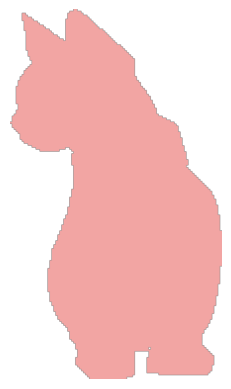

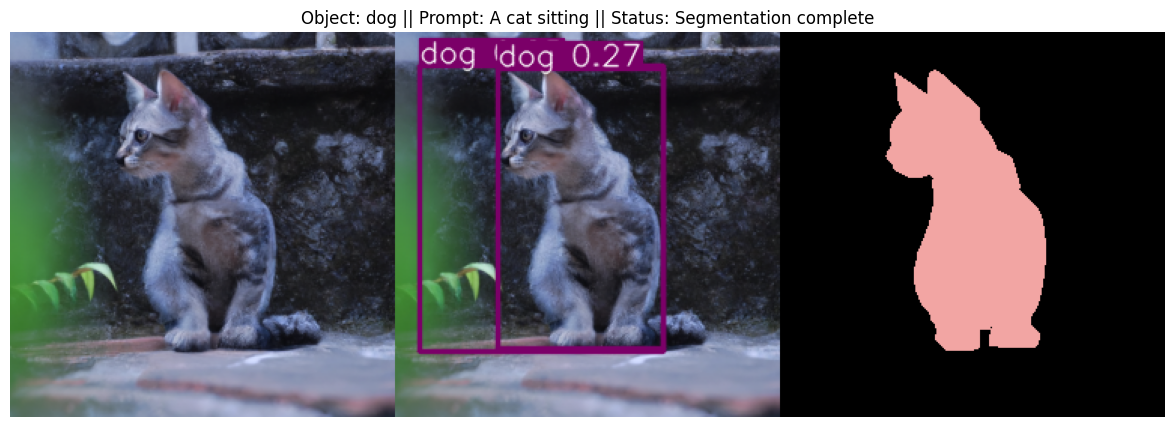

Target Object = bus

0: 640x640 1 bus, 9.0ms
Speed: 6.1ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Detected Objects: ['bus']
Most relevant object to target object = bus


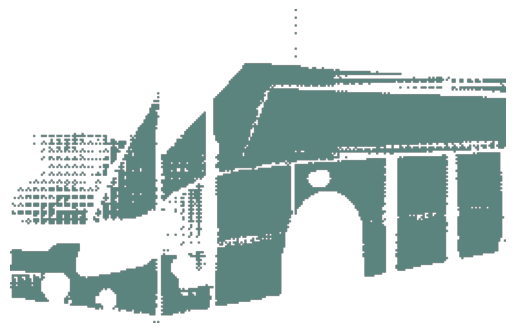

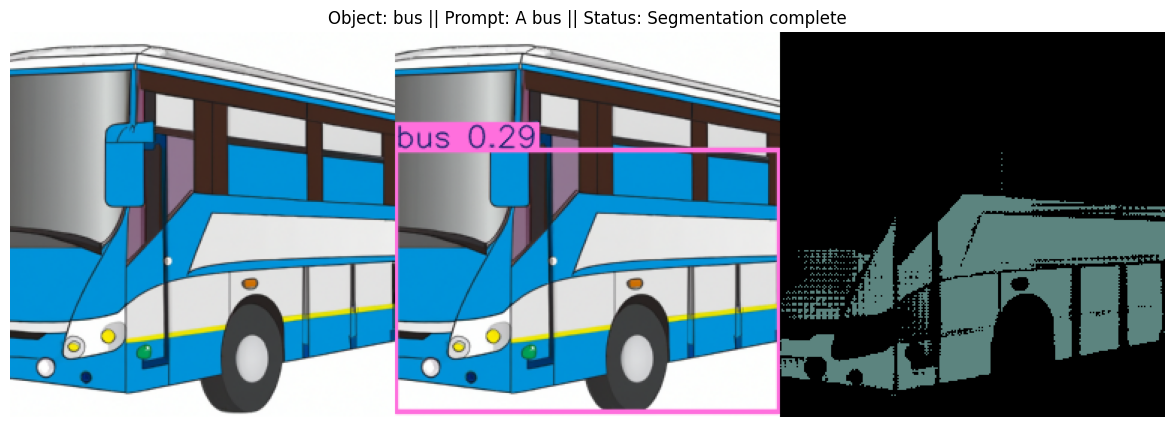

objects_array = ['cat', 'bus']
extracted_images = {'cat': <PIL.Image.Image image mode=RGBA size=107x187 at 0x7B09D570B250>, 'bus': <PIL.Image.Image image mode=RGBA size=256x162 at 0x7B09D5612A10>}


In [11]:
objects_array = []
extracted_images = {}
object_color = {}

# Iterate through images, target objects, and edited prompts
for image, target_object, edited_prompt in zip(images, target_object_array, edited_prompts_array):
    mask = segment_image(image, target_object, edited_prompt, recusive_diff_prompt,object_color)
    if mask is not None:
        extracted_images[target_object] = mask
        objects_array.append(target_object)

print("objects_array =", objects_array)
print("extracted_images =", extracted_images)

if not extracted_images:
    raise ValueError("No images were extracted. Please check the input data.")

# Clear GPU memory for all objects
# clear_gpu_memory(model, predictor, sam)
del model
del predictor
del sam
gc.collect()
torch.cuda.empty_cache()

# **Stacking Order Helper Functions**

In [12]:
# Initialize the chessboard & Number Board
chessboard = []
number_board = []

# Define the columns and rows labels
columns = ''.join([chr(ord('a') + i) for i in range(gird_dim)])
rows = ''.join([str(gird_dim - i) for i in range(gird_dim)])

# Populate the chessboard with the corresponding positions
for (i,row) in enumerate(rows):
    chessboard_row = []
    number_row = []
    for (j,col) in enumerate(columns):
        chessboard_row.append(col + row)
        number_row.append(i * gird_dim + j + 1)
    chessboard.append(chessboard_row)
    number_board.append(number_row)

# Function to create a rectangle of given size at a random position
def create_rectangle(height, width=None):
    if width == None:
      width = height

    max_row = gird_dim - height
    max_col = gird_dim - width

    start_row = random.randint(0, max_row)
    start_col = random.randint(0, max_col)

    rectangle = []
    for i in range(start_row, start_row + height):
        row = []
        for j in range(start_col, start_col + width):
            row.append(chessboard[i][j])
        rectangle.append(row)

    return rectangle

# Function to convert a chessboard rectangle to a number board rectangle
def chessboard_to_numberboard(chessboard_rectangle):
    chessboard_rectangle = [chessboard_rectangle]
    numberboard_rectangle = []
    for row in chessboard_rectangle:
        numberboard_row = []
        for cell in row:
            for i in range(gird_dim):
                for j in range(gird_dim):
                    if chessboard[i][j] == cell:
                        numberboard_row.append(number_board[i][j])
        numberboard_rectangle.append(numberboard_row)
    return numberboard_rectangle[0]

#**Getting Stacking order for extracted segments from GPT 4o mini**

In [13]:
def get_grid_positions_and_stack(prompt, objects_array):
    instruction = f"""
    You are an AI assistant that arranges objects in a {gird_dim}x{gird_dim} grid based on a prompt and a list of extracted objects.
    """

    prompt_content = f"""
    You are given a {gird_dim}x{gird_dim} grid with {gird_dim*gird_dim} boxes, similar to a chessboard. The grid has the following format:
    {chessboard}
    You are also provided with a prompt and a list of extracted objects. For each object, determine which box(es) it should occupy in the grid. If the object occupies multiple boxes, list all the boxes it occupies. Additionally, determine the stacking order of the objects, meaning which objects should appear on top of others.

    Consider the objects' relationship in the prompt and suggest the most visually appealing and logically correct arrangement. Ensure that objects with a natural horizontal or vertical orientation (e.g., a car) receive appropriate grid positions. For example:
    - Square objects like a box or a table should occupy positions like {create_rectangle(2)} or {create_rectangle(3)} but not diagonal or elongated positions.
    - Rectangular objects like a book or a door should occupy positions like {create_rectangle(3,2)} for horizontal orientation and {create_rectangle(2, 3)} for vertical orientation.
    - The relative size of the object. Smaller objects (e.g., a ball or a flower) will likely occupy a single box, while larger objects (e.g., a car or a tree) may occupy two or even three boxes.

    Here are a few examples:
    - If the object is a "table", it might occupy positions like {create_rectangle(3)}.
    - If the object is a "book", it might occupy positions like {create_rectangle(2, 3)} or {create_rectangle(1, 2)} depending on its orientation.

    Even though the background is not explicitly provided with the objects, keep the background context in mind when determining the objects' grid positions. This ensures that the overall scene is visually coherent.
    Make sure there is a list within a list just one grid position for each object and not a 2D list.
    This arrangement is intended for creating masks to be used in a Dense Diffusion model.

    Return the result in a valid JSON format as follows:
    {{
        "grid_positions": {{
            "Object Name 1": [list_of_boxes],
            "Object Name 2": [list_of_boxes]
        }},
        "stacking_order": ["Object Name 1", "Object Name 2"]
    }}
    Make sure the JSON is correctly formatted.

    Prompt: {prompt}
    Objects: {objects_array}
    """

    print("prompt_content =", prompt_content)

    gpt_4o_mini_response = gpt_4o_mini(prompt_content, instruction)

    # Remove triple backticks and any extra whitespace
    cleaned_response = gpt_4o_mini_response.strip("```").strip()

    # Check for prefix issues like "json\n{...}"
    if cleaned_response.startswith("json"):
        cleaned_response = cleaned_response[len("json"):].strip()

    # Remove any comments in the response
    cleaned_response = '\n'.join(line for line in cleaned_response.splitlines() if not line.strip().startswith("//"))

    try:
        gpt_4o_mini_response = json.loads(cleaned_response)
        grid_positions_by_gpt = gpt_4o_mini_response["grid_positions"]
        stacking_order_by_gpt = gpt_4o_mini_response["stacking_order"]
        print("---------------------------------------------")
        print("gpt_4o_mini_response =", gpt_4o_mini_response)
        print("---------------------------------------------")
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", str(e))
        grid_positions_by_gpt = None
        stacking_order_by_gpt = None

    return grid_positions_by_gpt, stacking_order_by_gpt

grid_positions_by_gpt, stacking_order = get_grid_positions_and_stack(recusive_diff_prompt, objects_array)
print("Grid Positions =", grid_positions_by_gpt)
print("Stacking Order =", stacking_order)

prompt_content = 
    You are given a 4x4 grid with 16 boxes, similar to a chessboard. The grid has the following format:
    [['a4', 'b4', 'c4', 'd4'], ['a3', 'b3', 'c3', 'd3'], ['a2', 'b2', 'c2', 'd2'], ['a1', 'b1', 'c1', 'd1']]
    You are also provided with a prompt and a list of extracted objects. For each object, determine which box(es) it should occupy in the grid. If the object occupies multiple boxes, list all the boxes it occupies. Additionally, determine the stacking order of the objects, meaning which objects should appear on top of others.

    Consider the objects' relationship in the prompt and suggest the most visually appealing and logically correct arrangement. Ensure that objects with a natural horizontal or vertical orientation (e.g., a car) receive appropriate grid positions. For example:
    - Square objects like a box or a table should occupy positions like [['b4', 'c4'], ['b3', 'c3']] or [['a4', 'b4', 'c4'], ['a3', 'b3', 'c3'], ['a2', 'b2', 'c2']] but not diagon

# **Converting Grid Position into Number Position**

In [14]:
# converting grid_positions
grid_positions = {}
for obj in grid_positions_by_gpt:
  grid_positions[obj] = chessboard_to_numberboard(grid_positions_by_gpt[obj])

# Print the chessboard
print("Chessboard:")
for row in chessboard:
    print(row)

print("--------------")

# Print the number board
print("Number Board:")
for row in number_board:
    print(row)

print("--------------")

print("grid_positions_by_gpt =",grid_positions_by_gpt)
print("grid_positions =",grid_positions)

Chessboard:
['a4', 'b4', 'c4', 'd4']
['a3', 'b3', 'c3', 'd3']
['a2', 'b2', 'c2', 'd2']
['a1', 'b1', 'c1', 'd1']
--------------
Number Board:
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
--------------
grid_positions_by_gpt = {'cat': ['b3'], 'bus': ['a2', 'a3', 'b2', 'b4']}
grid_positions = {'cat': [6], 'bus': [9, 5, 10, 2]}


#**Making Composite Mask using stack order**

Mounted at /content/drive
start_row = 0
end_row = 2
start_col = 1
end_col = 1
---------------


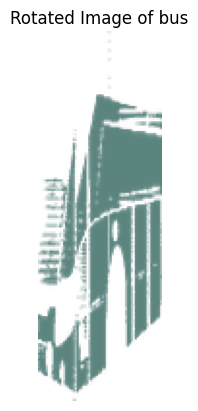

---------------
---------------


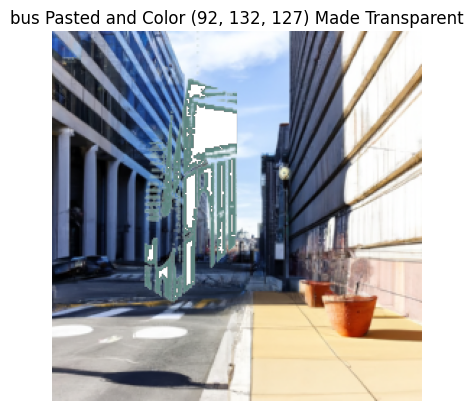

---------------
start_row = 1
end_row = 1
start_col = 1
end_col = 1
---------------


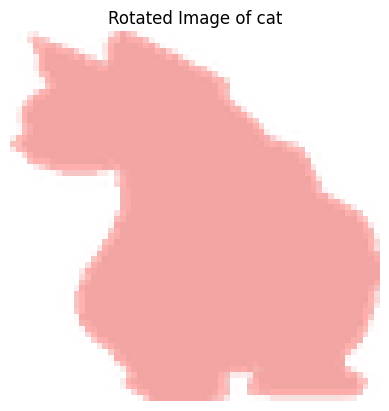

---------------
---------------


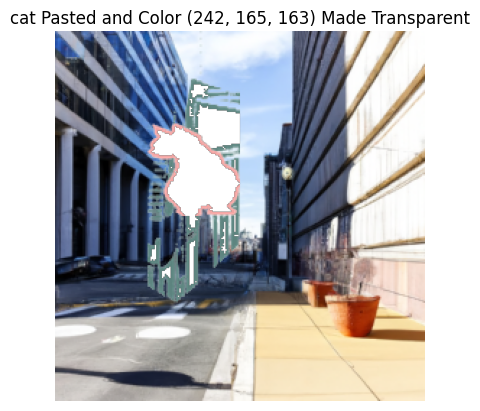

---------------
---------------


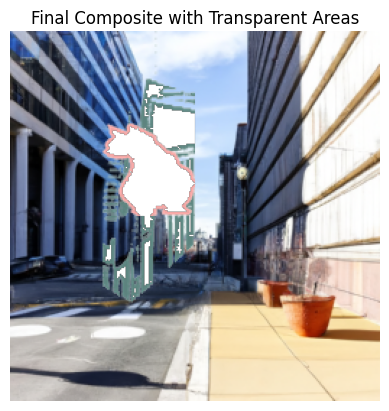

---------------
Image saved to /content/drive/My Drive/final_composite.png


In [15]:
# Define the canvas size and create a canvas from the background image
canvas_size = (image_dim, image_dim)  # Example: 900x900 pixels, adjust as needed
canvas = background_image.convert("RGBA").copy()  # Ensure RGBA mode for transparency

def display_canvas(canvas_to_display, display_text):
    # Convert the canvas to a format that can be displayed using matplotlib
    canvas_np = np.array(canvas_to_display)

    # Display the result using matplotlib
    print("---------------")
    plt.imshow(canvas_np)
    plt.title(display_text)
    plt.axis('off')  # Hide axes
    plt.show()
    print("---------------")

# Define the grid size
grid_size = (gird_dim, gird_dim)  # gird_dim x gird_dim grid
cell_width = canvas_size[0] // grid_size[0]
cell_height = canvas_size[1] // grid_size[1]

def get_grid_coordinates(grid_positions):
    """Calculate top-left and bottom-right coordinates of the mask based on grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    # Calculate top-left coordinates
    top_left_x = ((min_pos - 1) % grid_size[0]) * cell_width
    top_left_y = ((min_pos - 1) // grid_size[0]) * cell_height

    # Calculate bottom-right coordinates
    bottom_right_x = ((max_pos - 1) % grid_size[0] + 1) * cell_width
    bottom_right_y = ((max_pos - 1) // grid_size[0] + 1) * cell_height

    return top_left_x, top_left_y, bottom_right_x, bottom_right_y

def calculate_rotation_angle(grid_positions):
    """Calculate the rotation angle based on the grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    start_row = (min_pos - 1) // grid_size[0]
    end_row = (max_pos - 1) // grid_size[0]
    start_col = (min_pos - 1) % grid_size[0]
    end_col = (max_pos - 1) % grid_size[0]
    print("start_row =", start_row)
    print("end_row =", end_row)
    print("start_col =", start_col)
    print("end_col =", end_col)

    # Calculate the height and width of the grid span
    height = abs((end_row - start_row + 1) * cell_height)
    width = abs((end_col - start_col + 1) * cell_width)

    # Check if the mask is purely vertical or horizontal
    if height == cell_height or width == cell_width:
        return 0  # No rotation for purely vertical or horizontal spans

    # Calculate the rotation angle in degrees
    angle_rad = atan2(height, width)
    angle_deg = degrees(angle_rad)
    print("angle_deg =", angle_deg)
    return angle_deg

# Function to make a specific color transparent on the canvas
def make_color_transparent(canvas, color_to_make_transparent):
    canvas_np = np.array(canvas)  # Convert to NumPy array for pixel manipulation

    # Get the RGBA values of the target color to make transparent
    r, g, b = color_to_make_transparent[:3]

    # Find all pixels matching the target color and make them transparent
    transparency_mask = (canvas_np[:, :, 0] == r) & (canvas_np[:, :, 1] == g) & (canvas_np[:, :, 2] == b)
    canvas_np[transparency_mask] = [0, 0, 0, 0]  # Set the pixels to fully transparent

    return Image.fromarray(canvas_np)

# Iterate through the stacking order to overlay images
for obj in stacking_order:
    # Get the image and grid positions
    img = extracted_images[obj]
    positions = grid_positions[obj]
    color_to_make_transparent = object_color[obj]

    # Calculate the grid coordinates
    top_left_x, top_left_y, bottom_right_x, bottom_right_y = get_grid_coordinates(positions)

    # Validate the calculated dimensions
    new_width = max(1, bottom_right_x - top_left_x)
    new_height = max(1, bottom_right_y - top_left_y)

    # Resize the image to fit within the calculated grid area
    resized_img = img.resize((new_width, new_height), Image.LANCZOS)

    # Calculate the rotation angle
    rotation_angle = calculate_rotation_angle(positions)
    ####################### SETTING IT TO 0 UNTIL WE FIX ROTATION !!!!!!!!!!!!!!!!!!!
    rotation_angle = 0

    # Rotate the image if needed
    if rotation_angle != 0:
        rotated_img = resized_img.rotate(rotation_angle, expand=True)
    else:
        rotated_img = resized_img

    # Display the rotated image before pasting
    display_canvas(rotated_img, f"Rotated Image of {obj}")

    # Calculate new top-left coordinates to center the rotated image in the grid area
    new_top_left_x = top_left_x + (new_width - rotated_img.width) // 2
    new_top_left_y = top_left_y + (new_height - rotated_img.height) // 2

    # Paste the rotated image onto the canvas
    canvas.paste(rotated_img, (new_top_left_x, new_top_left_y), rotated_img)

    # Make the color on the canvas transparent
    canvas = make_color_transparent(canvas, color_to_make_transparent)

    # Display the canvas after making the color transparent
    display_canvas(canvas, f"{obj} Pasted and Color {color_to_make_transparent} Made Transparent")

display_canvas(canvas, "Final Composite with Transparent Areas")

file_name = 'final_composite.png'
file_path = os.path.join('/content/drive/My Drive/', file_name)

# Save the final canvas image to the specified file path
canvas.save(file_path, format='PNG')
print(f"Image saved to {file_path}")


---------------


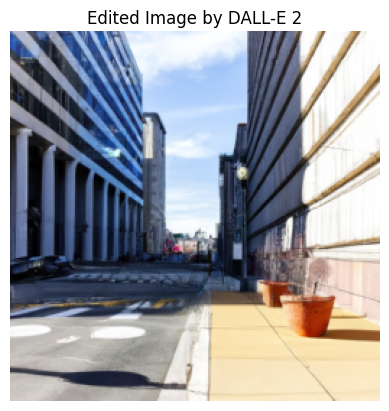

---------------


In [16]:
from openai import OpenAI
from io import BytesIO
import requests
import tempfile

client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

def dalle2_edit_image(background_image, mask_image, prompt):
    # Save the background image to a temporary file
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_background:
        background_image.save(temp_background.name, format="PNG")

        # Save the mask image to a temporary file
        with tempfile.NamedTemporaryFile(suffix=".png") as temp_mask:
            mask_image.save(temp_mask.name, format="PNG")

            # Call DALL-E 2 API to edit the image
            response = client.images.edit(
                model="dall-e-2",
                image=open(temp_background.name, "rb"),
                mask=open(temp_mask.name, "rb"),
                prompt=prompt,
                n=1,  # Generate 1 image
                size= f"{image_dim}x{image_dim}",
            )

            if response and len(response.data) > 0:
                # Get the image URL from the response
                image_url = response.data[0].url

                # Download the edited image from the URL
                img_response = requests.get(image_url)
                if img_response.status_code == 200:
                    edited_image = Image.open(BytesIO(img_response.content))
                    return edited_image
                else:
                    raise Exception(f"Failed to download the image from URL: {image_url}")
            else:
                raise Exception("DALL-E 2 API call failed or returned no data.")

# Usage Example:
# Assuming `canvas` is your current mask and `background_image` is your background
edited_image = dalle2_edit_image(background_image, canvas, recusive_diff_prompt)

# Display the edited image
display_canvas(edited_image, "Edited Image by DALL-E 2")


In [17]:
# # Define the canvas size and create a black canvas
# canvas_size = (image_dim, image_dim)  # Example: 900x900 pixels, adjust as needed
# # canvas = Image.new("RGBA", canvas_size, (0, 0, 0, 255))  # Black canvas
# canvas = background_image.copy()

# def display_canvas(canvas_to_display,display_text):
#   # Convert the canvas to a format that can be displayed using matplotlib
#   canvas_np = np.array(canvas_to_display)

#   # Display the result using matplotlib
#   plt.imshow(canvas_np)
#   plt.title(display_text)
#   plt.axis('off')  # Hide axes
#   plt.show()

# # 1  2  3  4  5  6
# # 7  8  9  10 11 12
# # 13 14 15 16 17 18
# # 19 20 21 22 23 24
# # 25 26 27 28 29 30
# # 31 32 33 34 35 36

# # Define the grid size
# grid_size = (gird_dim, gird_dim)  # gird_dim x gird_dim grid
# cell_width = canvas_size[0] // grid_size[0]
# cell_height = canvas_size[1] // grid_size[1]

# def get_grid_coordinates(grid_positions):
#     """Calculate top-left and bottom-right coordinates of the mask based on grid positions."""
#     min_pos = min(grid_positions)
#     max_pos = max(grid_positions)

#     # Calculate top-left coordinates
#     top_left_x = ((min_pos - 1) % grid_size[0]) * cell_width
#     top_left_y = ((min_pos - 1) // grid_size[0]) * cell_height

#     # Calculate bottom-right coordinates
#     bottom_right_x = ((max_pos - 1) % grid_size[0] + 1) * cell_width
#     bottom_right_y = ((max_pos - 1) // grid_size[0] + 1) * cell_height

#     return top_left_x, top_left_y, bottom_right_x, bottom_right_y

# def calculate_rotation_angle(grid_positions):
#     """Calculate the rotation angle based on the grid positions."""
#     min_pos = min(grid_positions)
#     max_pos = max(grid_positions)

#     start_row = (min_pos - 1) // grid_size[0]
#     end_row = (max_pos - 1) // grid_size[0]
#     start_col = (min_pos - 1) % grid_size[0]
#     end_col = (max_pos - 1) % grid_size[0]
#     print("start_row =",start_row)
#     print("end_row =",end_row)
#     print("start_col =",start_col)
#     print("end_col =",end_col)

#     # Calculate the height and width of the grid span
#     height = abs((end_row - start_row + 1) * cell_height)
#     width = abs((end_col - start_col + 1) * cell_width)

#     # Check if the mask is purely vertical or horizontal
#     if height == cell_height or width == cell_width:
#         return 0  # No rotation for purely vertical or horizontal spans

#     # Calculate the rotation angle in degrees
#     angle_rad = atan2(height, width)
#     angle_deg = degrees(angle_rad)
#     print("angle_deg =",angle_deg)
#     return angle_deg

# # Iterate through the stacking order to overlay images
# for obj in stacking_order:
#     # Get the image and grid positions
#     img = extracted_images[obj]
#     positions = grid_positions[obj]

#     # Calculate the grid coordinates
#     top_left_x, top_left_y, bottom_right_x, bottom_right_y = get_grid_coordinates(positions)

#     # Validate the calculated dimensions
#     new_width = max(1, bottom_right_x - top_left_x)
#     new_height = max(1, bottom_right_y - top_left_y)

#     # Resize the image to fit within the calculated grid area
#     resized_img = img.resize((new_width, new_height), Image.LANCZOS)

#     # Calculate the rotation angle
#     rotation_angle = calculate_rotation_angle(positions)
#     ####################### SETTING IT TO 0 UNTIL WE FIX ROTATION !!!!!!!!!!!!!!!!!!!
#     rotation_angle = 0

#     # Rotate the image if needed
#     if rotation_angle != 0:
#         rotated_img = resized_img.rotate(rotation_angle, expand=True)
#     else:
#         rotated_img = resized_img

#     # Calculate new top-left coordinates to center the rotated image in the grid area
#     new_top_left_x = top_left_x + (new_width - rotated_img.width) // 2
#     new_top_left_y = top_left_y + (new_height - rotated_img.height) // 2

#     non_transparent_pixels =

#     # Paste the rotated image onto the canvas at the calculated top-left position
#     canvas.paste(rotated_img, (new_top_left_x, new_top_left_y), rotated_img)
#     display_canvas(canvas,obj)

# display_canvas(canvas,"Composite Mask")

# # Convert the NumPy array back to a PIL Image
# canvas_pil = Image.fromarray(canvas_np)

# **Editing using DALL·E 2**

# **Loading CLIP Model**


In [18]:
model_path = "/content/clip_model.pt"

if os.path.exists(model_path):
    clip_model, preprocess = torch.load(model_path)
else:
    clip_model, preprocess = clip.load("ViT-B/32", device=device)
    torch.save((clip_model, preprocess), model_path)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 175MiB/s]


# **Calculating Clip Score**

In [19]:
def calculate_clip_score(image, prompt, model_name="ViT-B/32", device=None):
    # Set device
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"


    # Preprocess the image
    image_processed = preprocess(image).unsqueeze(0).to(device)

    # Tokenize the prompt
    text_input = clip.tokenize([prompt]).to(device)

    # Calculate the CLIP score
    with torch.no_grad():
        image_features = clip_model.encode_image(image_processed)
        text_features = clip_model.encode_text(text_input)

        # Normalize the features
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Calculate the cosine similarity between the image and the text prompt
        similarity_score = (image_features @ text_features.T).cpu().numpy()[0][0]

    # Return the similarity score
    return similarity_score


# **Calculating Clip Score for DallE-2 Edited Images**

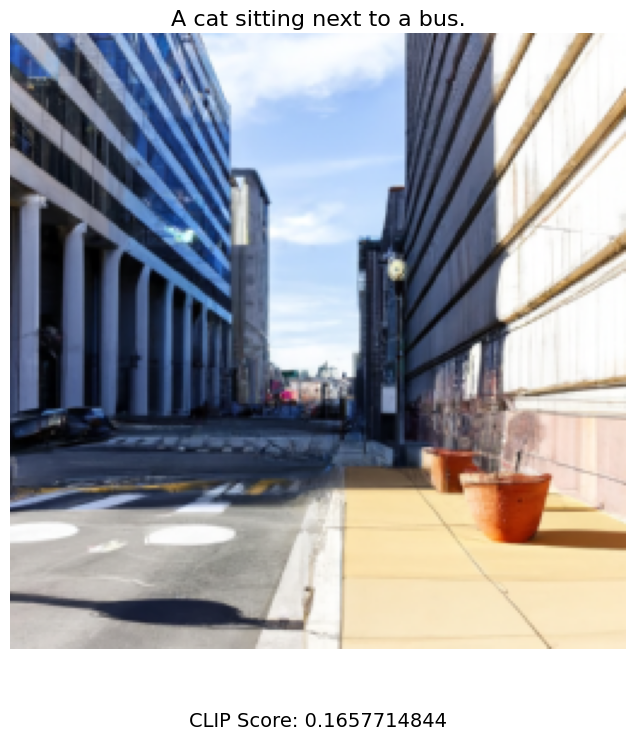

In [26]:
clip_score=calculate_clip_score(edited_image,recusive_diff_prompt)


def display_image_with_score(image, prompt, clip_score):
    # Convert the image to a format that can be displayed using matplotlib
    image_np = np.array(image)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the image
    ax.imshow(image_np)

    # Set the title as the prompt
    ax.set_title(prompt, fontsize=16)

    # Display the CLIP score below the image
    ax.text(0.5, -0.1, f"CLIP Score: {clip_score:.10f}", fontsize=14, ha='center', va='top', transform=ax.transAxes)

    # Hide axes
    ax.axis('off')

    # Show the plot
    plt.show()


display_image_with_score(edited_image, recusive_diff_prompt, clip_score)


# **Recursive Diffusion using Dense Diffusion Image**

In [21]:
# # Calculating Clip Score for Dense Diffusion
# clip_score = calculate_clip_score(image[0], recusive_diff_prompt)

# # Print the recursive_diff_prompt for debugging
# print("recursive_diff_prompt =", recusive_diff_prompt)

# # Create a shortened version of the prompt for display
# display_prompt = ' '.join(recusive_diff_prompt.split()[:15])

# # Adjust the figsize for larger images
# fig, axes = plt.subplots(1, len(image) + 1, figsize=(30, 15))

# # Display the layout image with the stacking order and grid positions below the image
# axes[0].imshow(layout_img_)
# axes[0].axis('off')
# axes[0].text(0.5, -0.1, f"SO: {str(stacking_order)} || GP: {grid_positions}", fontsize=40, ha='center', transform=axes[0].transAxes)

# # Display each image with the corresponding title and CLIP score below the images
# for i in range(len(image)):
#     axes[i + 1].imshow(image[i])
#     axes[i + 1].axis('off')
#     clip_text = f"CLIP Score: {clip_score:.4f}"
#     axes[i + 1].text(0.5, -0.1, clip_text, fontsize=40, ha='center', transform=axes[i + 1].transAxes)

# # Set the combined title for the figure
# fig.suptitle(f"{display_prompt}", fontsize=48)

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)  # Adjust top to accommodate the suptitle
# plt.show()


# **Simple Stable Diffusion Image**

In [22]:
# # Calculating Clip Score for Stable Diffusion
# clip_score_stable_diffusion = calculate_clip_score(stable_diffusion_image, recusive_diff_prompt)

# # Print the prompt for debugging
# print("Prompt =", recusive_diff_prompt)

# # Display the Stable Diffusion image
# plt.imshow(stable_diffusion_image)
# plt.axis('off')

# # Create the display text with the shortened prompt and CLIP score
# display_text = f'{display_prompt} || CLIP Score: {clip_score_stable_diffusion:.4f}'

# # Set the title with the display text
# plt.title(display_text, fontsize=18)

# # Show the plot
# plt.show()


In [23]:
print_time_taken(start_time,"complete code")

Time taken for complete code: 2 minutes and 23 seconds


## **SOA-I Score**

In [24]:
# import numpy as np
# from torchvision.transforms import functional as F
# from PIL import Image
# import torch

# # Function to calculate Intersection Over Union (IoU)
# def calculate_iou(segmentation_mask, ground_truth_mask):
#     intersection = np.logical_and(segmentation_mask, ground_truth_mask).sum()
#     union = np.logical_or(segmentation_mask, ground_truth_mask).sum()
#     iou = intersection / union if union != 0 else 0
#     return iou

# # Function to calculate SOA-I score
# def calculate_soa_i(image, objects_array, predictor):
#     soa_i_scores = []

#     # Convert image to format required by SAM
#     image_pil = Image.fromarray(np.uint8(image[0] * 255))  # Assuming image is in [0, 1] range

#     # Predict segmentation masks for objects in the image
#     masks = []
#     for obj in objects_array:
#         # Predict the segmentation mask for the current object
#         segmentation = predictor.predict(image_pil, obj['bbox'])
#         masks.append(segmentation['mask'])

#     # Calculate SOA-I score
#     for mask in masks:
#         iou_scores = []
#         for gt_obj in objects_array:
#             # Create ground truth mask from objects_array
#             gt_mask = np.zeros_like(mask, dtype=np.uint8)
#             gt_bbox = gt_obj['bbox']
#             gt_mask[gt_bbox[1]:gt_bbox[3], gt_bbox[0]:gt_bbox[2]] = 1
#             iou = calculate_iou(mask, gt_mask)
#             iou_scores.append(iou)

#         # SOA-I is the average IoU score for each object
#         soa_i = np.mean(iou_scores) if iou_scores else 0
#         soa_i_scores.append(soa_i)

#     return np.mean(soa_i_scores) if soa_i_scores else 0

# # Calculate SOA-I score for the image and objects
# soa_i_score = calculate_soa_i(image[0], objects_array, predictor)

# # Print the SOA-I score
# print(f"SOA-I Score: {soa_i_score:.4f}")
